In [2]:
import tweepy
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Twitter.csv to Twitter.csv


In [4]:
data=pd.read_csv('Twitter.csv')

In [5]:
apikey=data['API Key'][0]
apisecret=data['API Key Secret'][0]
accesstoken=data['Access Token'][0]

authentic=tweepy.OAuthHandler(apikey,apisecret)
api=tweepy.API(authentic,wait_on_rate_limit=True)

In [6]:
posts=api.user_timeline(screen_name="JoeBiden", count=100,lang="en",tweet_mode="extended")
i=1
for tweet in posts[0:5]:
  print(str(i)+'.'+' '+tweet.full_text + '\n')
  i=i+1

1. The Bipartisan Government Funding Bill includes $13.6B to address Russia's invasion of Ukraine and the impact on surrounding countries.

Putin's aggression against Ukraine has united people across America, united our two parties in Congress, and united the freedom-loving world.

2. There are over 200,000 kids in America and many more adults with Type 1 diabetes needing insulin every day.

It costs $10 to make a vial of insulin, yet the average cost can be up to $1,000 a month.

Let’s cap the cost of insulin at $35 a month.

3. Not only has Infrastructure Week finally arrived, but we’re talking about an infrastructure decade.  
 
Folks, we’ve already authorized 4,000 projects all across the country—including 1,500 bridges in disrepair—and they’re starting repairs this year.

4. RT @POTUS: My Administration is committed to closing the gender pay gap ensuring that all Americans have a fair and equal opportunity to ge…

5. As my mother would say, “God love them.”
https://t.co/XlDuH52PAi

In [7]:
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
def clean_text(text):
  text=re.sub(r'@[A-Za-z0-9]+',' ',text) #for removing '@' mentions
  text=re.sub(r'#','',text) #for removing the '#' symbol
  text=re.sub(r'http\S+',' ',text) #for removing URL's
  text=re.sub(r'\n','',text)

  #removing emojis from text
  re_emo=re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  text= re_emo.sub(r' ' , text)
  return text



In [8]:
df['Tweets']=df['Tweets'].apply(clean_text)
df

,Tweets
0,The Bipartisan Government Funding Bill include...
1,"There are over 200,000 kids in America and man..."
2,Not only has Infrastructure Week finally arriv...
3,RT : My Administration is committed to closin...
4,"As my mother would say, “God love them.”"
...,...
95,"Folks, I am proud to call myself a union presi..."
96,There’s a clear choice between a party that is...
97,RT : I look forward to welcoming German Chanc...
98,"When we invest in innovation, it powers up the..."


(-0.5, 999.5, 899.5, -0.5)

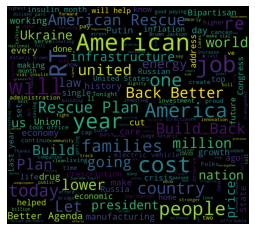

In [13]:
#to join all the sentences together
allw=' '.join([t for t in df['Tweets']])

#for wordcloud
wc=WordCloud(width=1000,height=900,random_state=20,max_font_size=100).generate(allw)
plt.imshow(wc)
plt.axis('off')
